# Punto 01 del Informe de Machine Learning

### Importaciones

In [1]:
import pandas as pd
import numpy as np
import warnings
import sklearn

### 1. Leer los datos del archivo titanic.csv.
#### Si el archivo se encuentra en su carpeta, corra el primer bloque, de no ser así, ejecute el segundo.

In [2]:
direccion = ("./data/titanic.csv")
datos = pd.read_csv(direccion, sep=";")

datos.columns = ["survived", "Name", "pclass", "sex", "age", "sibsp", "parch", "fare", "who", "embark_town", "alone"]

In [3]:
url = ("https://raw.githubusercontent.com/karenmoreno17/Informe-Machine-Learning/main/titanic.csv")
datos = pd.read_csv(url, sep=";")

datos.columns = ["survived", "Name", "pclass", "sex", "age", "sibsp", "parch", "fare", "who", "embark_town", "alone"]

### 2. Eliminación del atributo Name.

In [4]:
datos.drop(["Name"], axis = 1, inplace = True)

### 3. Selección del 80% de datos para entrenar, y el 20% restante para las pruebas.

In [5]:
from sklearn.model_selection import train_test_split 

n = len(datos)
datosEntreno = int(n * 0.8) #El 80% de los datos para el entreno y el 20% restante para las pruebas.
datosPruebas = n - datosEntreno
print(n, datosEntreno, datosPruebas) # Número de datos, datos de entreno y datos de pruebas
train_data, test_data = sklearn.model_selection.train_test_split(datos, train_size = datosEntreno, test_size = datosPruebas)

891 712 179


In [6]:
train_data.shape

(712, 10)

In [7]:
train_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town,alone
876,0,3,male,20.0,0,0,9.8458,man,Southampton,yes
169,0,3,male,28.0,0,0,56.4958,man,Southampton,yes
14,0,3,female,14.0,0,0,7.8542,child,Southampton,yes
20,0,2,male,35.0,0,0,26.0000,man,Southampton,yes
19,1,3,female,NaN,0,0,7.2250,woman,Cherbourg,yes


### 4. Normalizar los datos.

In [8]:
# Hasta el momento, tenemos las siguientes variables:

# Variables cuantitativas (de tipo entero).
datos.select_dtypes(include = ['int64']).describe()

,survived,pclass,sibsp,parch
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594
std,0.486592,0.836071,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000
max,1.000000,3.000000,8.000000,6.000000


In [9]:
# Variables cuantitativas (de tipo flotante).
datos.select_dtypes(include = ['float64']).describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [10]:
# Y variables categóricas (de tipo object).
datos.select_dtypes(include = ['object']).describe()

,sex,who,embark_town,alone
count,891,891,889,891
unique,2,3,3,2
top,male,man,Southampton,yes
freq,577,537,644,537


In [11]:
# Tenemos que crear los pipelines para cada las variables cuantitativas y las categóricas.

# ============================================================================================================================================================
# Pipeline para las variables cuantitativas.
# ============================================================================================================================================================

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Tenemos 6 variables cuantitativas
varCuantitativas = ['pclass', 'sibsp', 'parch', 'age', 'fare']

cuantiPipeline = Pipeline([
        ("imputer", SimpleImputer(strategy = "median")),
        ("scaler", StandardScaler()) 
    
    ])

In [12]:
# ============================================================================================================================================================
# Pipeline para las variables categóricas.
# ============================================================================================================================================================

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 6 atributos categóricos
varCategoricas = ['sex', 'who', 'embark_town', 'alone']

catePipeline = Pipeline([
        ("imputer", SimpleImputer(strategy = "most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse_output = False))
    ])

In [13]:
# ============================================================================================================================================================
# Pipeline completo.
# ============================================================================================================================================================

from sklearn.compose import ColumnTransformer

pipelineCompleto = ColumnTransformer([
    ("cuanti", cuantiPipeline, varCuantitativas),
    ("cate", catePipeline, varCategoricas), 
])

In [14]:
X_train = pipelineCompleto.fit_transform(train_data)

In [15]:
X_train.shape

(712, 15)

In [16]:
'''
Después de codificar y normalizar los datos, obtenemos 16 neuronas, de las cuales 5 corresponden a la variables cuantitativas,
y 10 (2 + 3 + 3 + 2) de las variables categóricas. 
'''

# Asignamos la variable dependiente, que para esta ocasión, es "survived"
Y_train = train_data['survived']
Y_train

876    0
169    0
14     0
20     0
19     1
      ..
108    0
636    0
214    0
767    0
796    1
Name: survived, Length: 712, dtype: int64

### 5. Construcción de 5 redes neuronales.

In [17]:
# ============================================================================================================================================================
# Primera red neuronal.
# ============================================================================================================================================================
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

primeraRed = MLPClassifier(activation = 'identity', solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (6), random_state = 123)
primeraRed.fit(X_train, Y_train)
scoreRed01 = cross_val_score(primeraRed, X_train, Y_train, cv = 10, scoring='accuracy')
print(scoreRed01)
scoreRed01.mean()

[0.77777778 0.81944444 0.81690141 0.85915493 0.87323944 0.8028169
 0.81690141 0.77464789 0.78873239 0.84507042]


0.8174687010954618

In [18]:
# ============================================================================================================================================================
# Segunda red neuronal.
# ============================================================================================================================================================
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

segundaRed = MLPClassifier(activation = 'tanh', solver = 'adam', alpha = 1e-5, hidden_layer_sizes = (6, 4, 2), random_state = 123)
segundaRed.fit(X_train, Y_train)
scoreRed02 = cross_val_score(segundaRed, X_train, Y_train, cv = 10, scoring='accuracy')
print(scoreRed01)
scoreRed02.mean()

c:\Users\Karen Daniela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Karen Daniela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Karen Daniela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Karen Daniela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum itera

[0.77777778 0.81944444 0.81690141 0.85915493 0.87323944 0.8028169
 0.81690141 0.77464789 0.78873239 0.84507042]


c:\Users\Karen Daniela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8174687010954618

In [19]:
# ============================================================================================================================================================
# Tercera red neuronal.
# ============================================================================================================================================================
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

terceraRed = MLPClassifier(activation = 'tanh', solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (2, 3, 3), random_state = 123)
terceraRed.fit(X_train, Y_train)
scoreRed03 = cross_val_score(terceraRed, X_train, Y_train, cv = 10, scoring='accuracy')
print(scoreRed03)
scoreRed03.mean()

c:\Users\Karen Daniela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Karen Daniela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Karen Daniela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_netw

[0.77777778 0.79166667 0.78873239 0.8028169  0.84507042 0.77464789
 0.81690141 0.8028169  0.81690141 0.81690141]


c:\Users\Karen Daniela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8034233176838811

In [20]:
# ============================================================================================================================================================
# Cuarta red neuronal.
# ============================================================================================================================================================
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

cuartaRed = MLPClassifier(activation = 'relu', solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (5, 5, 5), random_state = 123)
cuartaRed.fit(X_train, Y_train)
scoreRed04 = cross_val_score(cuartaRed, X_train, Y_train, cv = 10, scoring='accuracy')
print(scoreRed04)
scoreRed04.mean()

c:\Users\Karen Daniela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Karen Daniela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Karen Daniela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_netw

[0.75       0.80555556 0.84507042 0.83098592 0.8028169  0.76056338
 0.83098592 0.8028169  0.77464789 0.85915493]


c:\Users\Karen Daniela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8062597809076681

In [21]:
# ============================================================================================================================================================
# Quinta red neuronal.
# ============================================================================================================================================================
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

quintaRed = MLPClassifier(activation = 'logistic', solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (1, 5), random_state = 123)
quintaRed.fit(X_train, Y_train)
scoreRed05 = cross_val_score(quintaRed, X_train, Y_train, cv = 10, scoring='accuracy')
print(scoreRed05)
scoreRed05.mean()

[0.77777778 0.80555556 0.83098592 0.78873239 0.81690141 0.8028169
 0.81690141 0.81690141 0.8028169  0.83098592]


0.809037558685446

#### 5.1 Usando los datos de prueba con los modelos.

In [22]:
X_test = pipelineCompleto.transform(test_data)

In [23]:
# Con el primer modelo.

Y_predRed01 = primeraRed.predict(X_test)  
Y_predRed01

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [24]:
# Con el segundo modelo.

Y_predRed02 = segundaRed.predict(X_test)  
Y_predRed02

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [25]:
# Con el tercer modelo.

Y_predRed03 = terceraRed.predict(X_test)  
Y_predRed03

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [26]:
# Con el cuarto modelo.

Y_predRed04 = cuartaRed.predict(X_test)  
Y_predRed04

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [27]:
# Con el quinto modelo.

Y_predRed05 = quintaRed.predict(X_test)  
Y_predRed05

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [28]:
Y_test = test_data["survived"]

#### 5.2 Tabla de resumen con los accuracy obtenidos, y las matrices de confusión..

In [29]:
# Obtener los valores de accuracy

from sklearn.metrics import accuracy_score

acModelo01 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predRed01
       )
print(f"La precisión del modelo 01 es: {acModelo01 * 100}%")

acModelo02 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predRed02
       )
print(f"La precisión del modelo 02 es: {acModelo02 * 100}%")

acModelo03 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predRed03
       )
print(f"La precisión del modelo 03 es: {acModelo03 * 100}%")

acModelo04 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predRed04
       )
print(f"La precisión del modelo 04 es: {acModelo04 * 100}%")

acModelo05 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predRed05
       )
print(f"La precisión del modelo 05 es: {acModelo05 * 100}%")

La precisión del modelo 01 es: 84.91620111731844%
La precisión del modelo 02 es: 84.91620111731844%
La precisión del modelo 03 es: 82.68156424581005%
La precisión del modelo 04 es: 86.03351955307262%
La precisión del modelo 05 es: 84.35754189944134%


In [41]:
# Ingreso de los valores a la tabla.

listaAccuracy = [['Modelo01', acModelo01*100], ['Modelo02', acModelo02*100], ['Modelo03', acModelo03*100], 
                 ['Modelo04', acModelo04*100], ['Modelo05', acModelo05*100]]
Tabla = """\
+-------------------------------+
| Red         Accuracy          |       
|-------------------------------|
{}    
+-------------------------------+\
"""
Tabla = (Tabla.format('\n'.join("| {:<11} {:<10} |".format(*fila)
 for fila in listaAccuracy)))
print (Tabla)

+-------------------------------+
| Red         Accuracy          |       
|-------------------------------|
| Modelo01    84.91620111731844 |
| Modelo02    84.91620111731844 |
| Modelo03    82.68156424581005 |
| Modelo04    86.03351955307262 |
| Modelo05    84.35754189944134 |    
+-------------------------------+


##### 5.2.1 Matrices de confusión

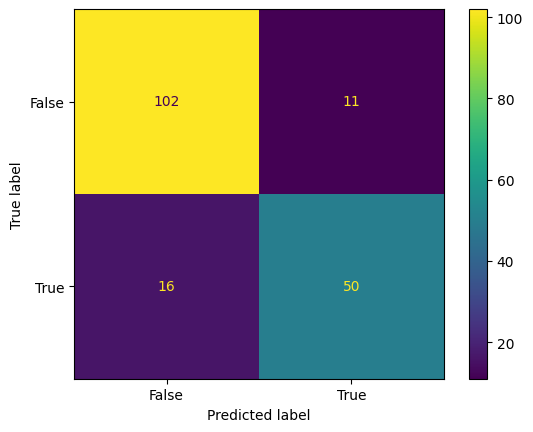

In [42]:
# Matriz de confusión del primer modelo

import matplotlib.pyplot as plt
import numpy as pd
from sklearn import metrics

matrizConfusion01 = metrics.confusion_matrix(Y_test, Y_predRed01)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrizConfusion01, display_labels = [False, True])

cm_display.plot()
plt.show()

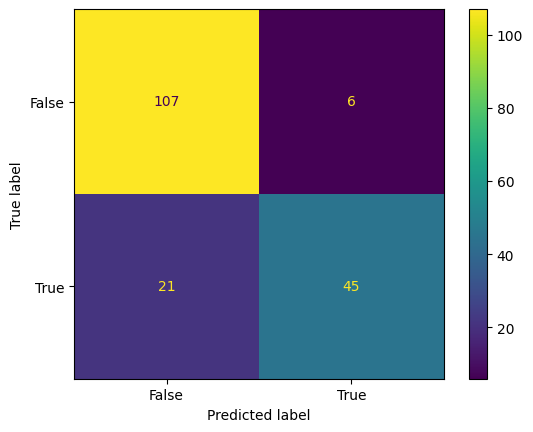

In [43]:
# Matriz de confusión del segundo modelo

import matplotlib.pyplot as plt
import numpy as pd
from sklearn import metrics

matrizConfusion02 = metrics.confusion_matrix(Y_test, Y_predRed02)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrizConfusion02, display_labels = [False, True])

cm_display.plot()
plt.show()

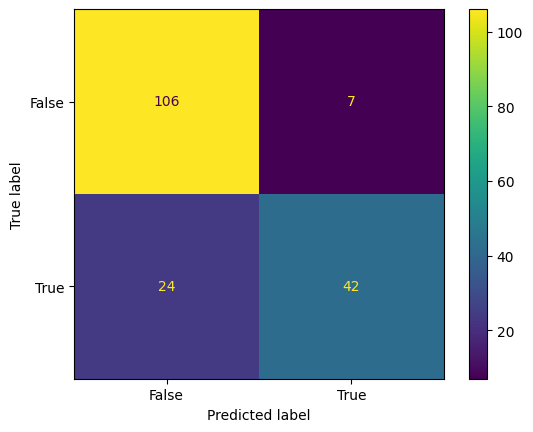

In [44]:
# Matriz de confusión del tercer modelo

import matplotlib.pyplot as plt
import numpy as pd
from sklearn import metrics

matrizConfusion03 = metrics.confusion_matrix(Y_test, Y_predRed03)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrizConfusion03, display_labels = [False, True])

cm_display.plot()
plt.show()

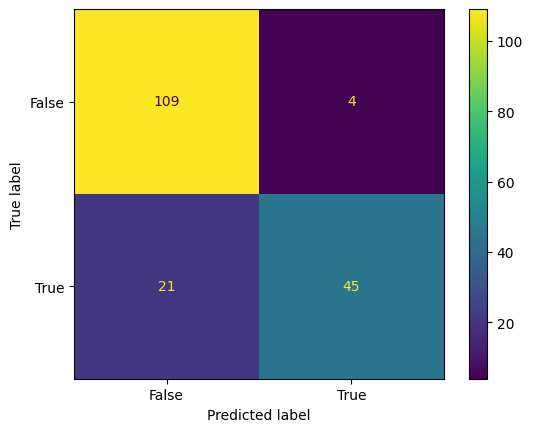

In [45]:
# Matriz de confusión del cuarto modelo

import matplotlib.pyplot as plt
import numpy as pd
from sklearn import metrics

matrizConfusion04 = metrics.confusion_matrix(Y_test, Y_predRed04)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrizConfusion04, display_labels = [False, True])

cm_display.plot()
plt.show()

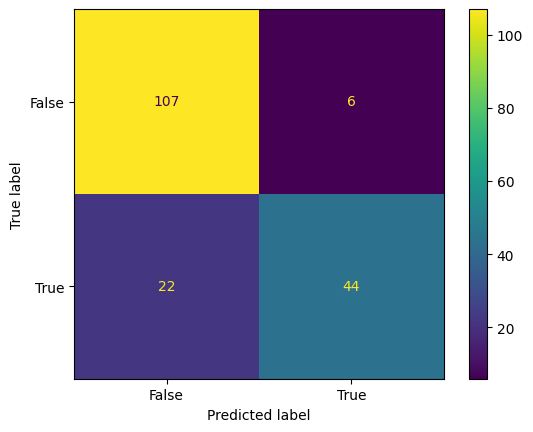

In [46]:
# Matriz de confusión del quinto modelo

import matplotlib.pyplot as plt
import numpy as pd
from sklearn import metrics

matrizConfusion05 = metrics.confusion_matrix(Y_test, Y_predRed05)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrizConfusion05, display_labels = [False, True])

cm_display.plot()
plt.show()